1.

In [207]:
using LinearAlgebra
include("LinearSystems.jl")
import .LinearSystems as ls
using Plots, LaTeXStrings
gr()

default(fontfamily = "Computer Modern",  # Font LaTeX-style
        legendfontsize = 10,
        tickfontsize = 9,
        guidefontsize = 11)

In [208]:

function lambdas_barycentric_form(x::AbstractVector)
    n = length(x)
    ω = ones(n)           # inversi dei pesi

    for k in 2:n
        x_k = x[k]

        # aggiorna gli ω dei nodi precedenti:
        for j in 1:k-1
            ω[j] *= (x[j] - x_k)
        end

        # calcola ω_k = ∏_{i=1}^{k-1} (x_k - x_i)
        w_k = 1.0
        for i in 1:k-1
            w_k *= (x_k - x[i])
        end
        ω[k] = w_k
    end

    λ = 1 ./ ω
    return λ
end

function barycentric_polinomial(nodes::AbstractVector, f::Function, x)
    n = length(nodes)
    λ = lambdas_barycentric_form(nodes)

    numerator = 0.0
    denominator = 0.0

    for j in 1:n
        if x == nodes[j]
            return f(nodes[j])  # caso speciale: t è uno dei nodi
        end

        numerator += λ[j] * f(nodes[j]) / (x - nodes[j])
        denominator += λ[j] / (x - nodes[j])
    end

    return numerator / denominator
end 

function lambdas_equidistant_points(n)
    lambdas = ones(n)
    lambdas[1] = n
    for i in 1:n-1
        lambdas[i+1] = lambdas[i] * (i-n)/i
    end
    return lambdas
end

function barycentric_interpolation_equidistant(min, max, n, f::Function, x)
    nodes = collect(range(min, max, length=n))
    λ = lambdas_equidistant_points(n)

    numerator = 0.0
    denominator = 0.0

    for j in 1:n
        if x == nodes[j]
            return f(nodes[j])  # caso speciale: t è uno dei nodi
        end

        numerator += λ[j] * f(nodes[j]) / (x - nodes[j])
        denominator += λ[j] / (x - nodes[j])
    end

    return numerator / denominator
end

barycentric_interpolation_equidistant (generic function with 1 method)

2. a.

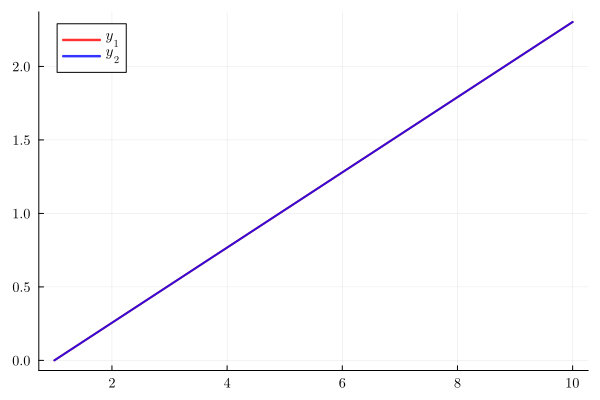

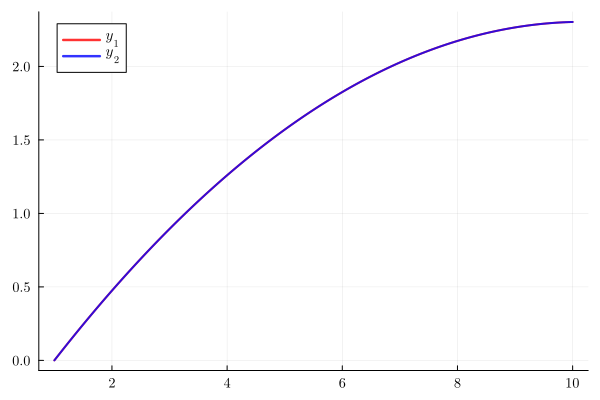

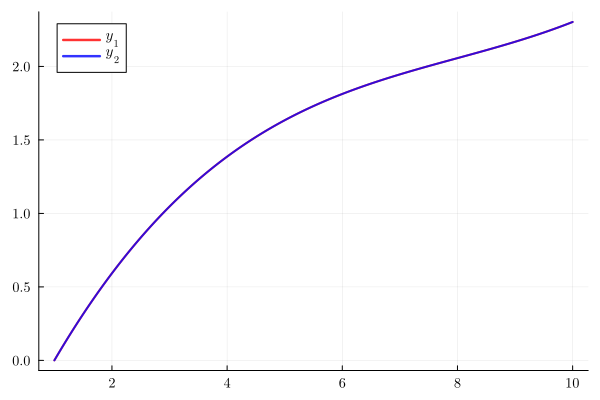

In [209]:
f(x) = log(x)
min = 1.0
max = 10.0
x = collect(range(1, 10, length=1000))
for n in 2:4
    h = (max - min)/(n-1)
    nodes = [min + (i-1)*h for i in 1:n]

    y_1=[barycentric_polinomial(nodes, f, x_i) for x_i in x]
    y_2=[barycentric_interpolation_equidistant(min, max, n, f, x_i) for x_i in x]

    #plot
    
    grafico = plot(x, y_1, 
              linewidth = 2, 
              color = :red, 
              alpha = 0.8, 
              label = L"$y_1$") 
            
    plot!(grafico, x, y_2,
      linewidth = 2,
      color = :blue,
      alpha = 0.8,
      label = L"$y_2$")
  
    display(grafico)

    
end


2. b.

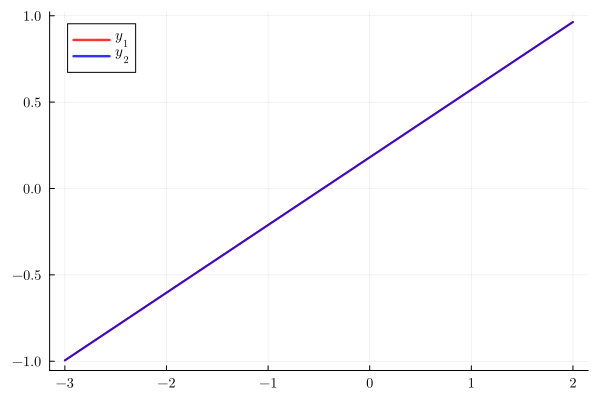

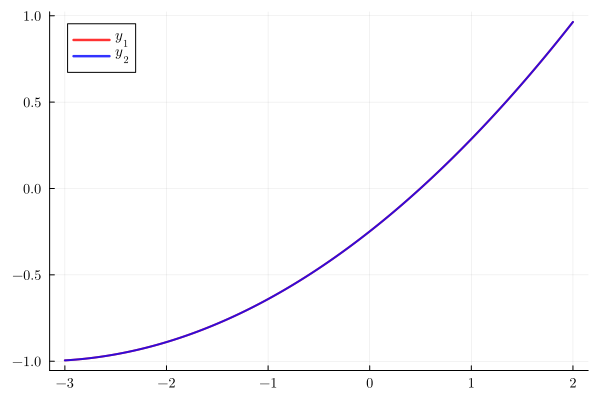

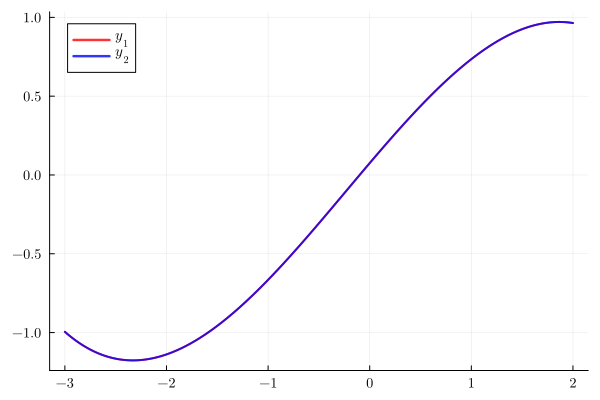

In [210]:
g(x) = tanh(x)
min = -3.0
max = 2.0
x = collect(range(min, max, length=1000))
for n in 2:4
    h = (max - min)/(n-1)
    nodes = [min + (i-1)*h for i in 1:n]

    y_1=[barycentric_polinomial(nodes, g, x_i) for x_i in x]
    y_2=[barycentric_interpolation_equidistant(min, max, n, g, x_i) for x_i in x]

    #plot
    grafico = plot(x, y_1, 
              linewidth = 2, 
              color = :red, 
              alpha = 0.8, 
              label = L"$y_1$")
    plot!(grafico, x, y_2,
      linewidth = 2, 
      markersize = 2,
      color = :blue,
      alpha = 0.8,
      label = L"$y_2$")

    display(grafico)

    
end


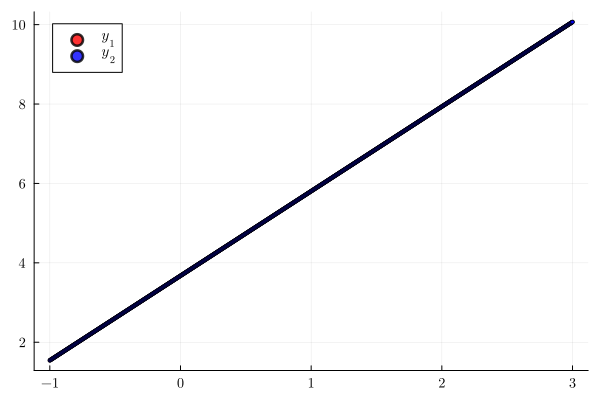

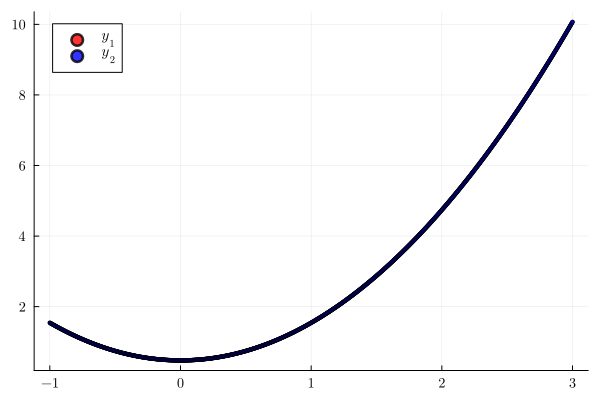

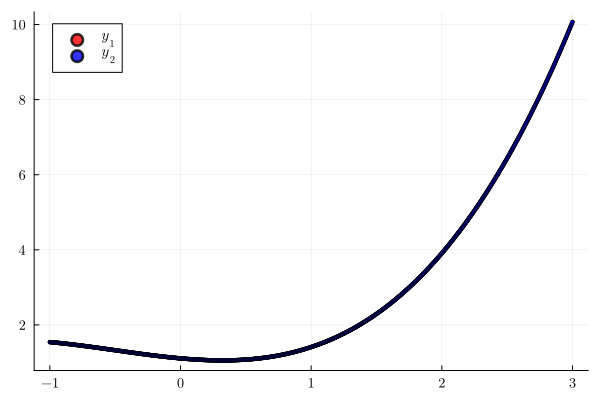

In [211]:
g(x) = cosh(x)
min = -1.0
max = 3.0
x = collect(range(min, max, length=1000))
for n in 2:4
    h = (max - min)/(n-1)
    nodes = [min + (i-1)*h for i in 1:n]

    y_1=[barycentric_polinomial(nodes, g, x_i) for x_i in x]
    y_2=[barycentric_interpolation_equidistant(min, max, n, g, x_i) for x_i in x]

    #plot
    grafico = plot(x, y_1, 
              seriestype = :scatter, 
              markersize = 2, 
              color = :red, 
              alpha = 0.8, 
              label = L"$y_1$")
    plot!(grafico, x, y_2,
      seriestype = :scatter, 
      markersize = 2,
      color = :blue,
      alpha = 0.8,
      label = L"$y_2$")

    display(grafico)

    
end


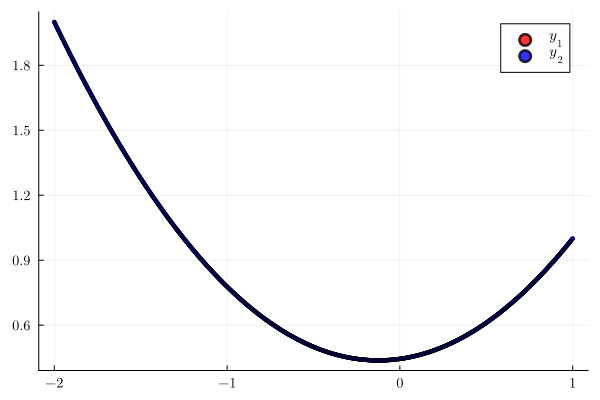

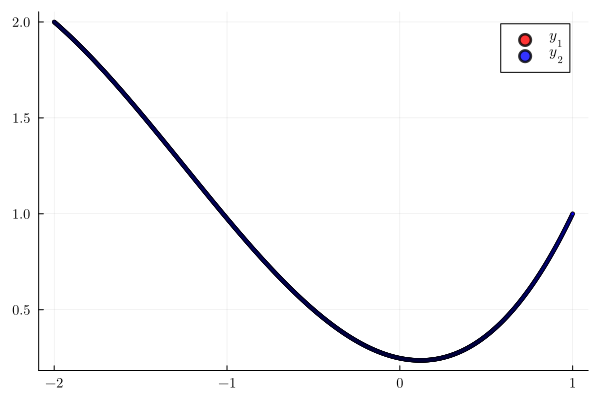

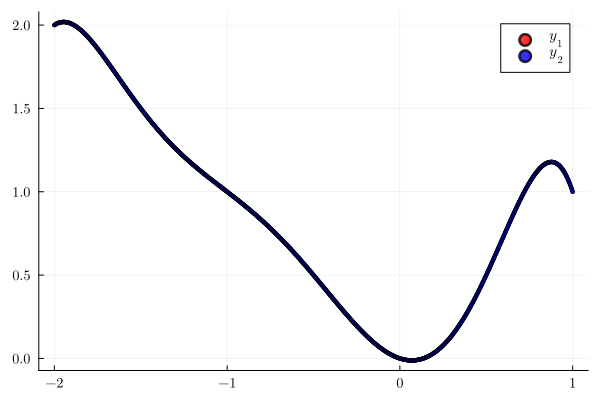

In [212]:
g(x) = abs(x)
min = -2.0
max = 1.0
x = collect(range(min, max, length=1000))
for n in 3:2:7
    h = (max - min)/(n-1)
    nodes = [min + (i-1)*h for i in 1:n]

    y_1=[barycentric_polinomial(nodes, g, x_i) for x_i in x]
    y_2=[barycentric_interpolation_equidistant(min, max, n, g, x_i) for x_i in x]

    #plot
    grafico = plot(x, y_1, 
              seriestype = :scatter, 
              markersize = 2, 
              color = :red, 
              alpha = 0.8, 
              label = L"$y_1$")
    plot!(grafico, x, y_2,
      seriestype = :scatter, 
      markersize = 2,
      color = :blue,
      alpha = 0.8,
      label = L"$y_2$")

    display(grafico)

    
end


EORRORS ON INTERPOLATIONS

es 1

In [213]:
function chebyshev_nodes_1kind(min, max, n)
    nodes = zeros(n)
    for k in 1:n
        x[k] = 0.5 * (min + max) - 0.5 * (max - min) * cos((2k - 1) * π / (2n))
        nodes[k] = min + (max-min) * (x[k] + 1)/2
    end
    return nodes
end

function chebyshev_nodes_2kind(min, max, n)
    nodes = zeros(n)
    for k in 1:n
        x[k] = - cos((k-1) * π / (n-1))
        nodes[k] = min + (max-min) * (x[k] + 1)/2
    end
    return nodes
end

function chebyshev_weight_1kind(n)
    λ  = ones(n)
    for i in 1:n
        λ[i] = (-1)^i * sin((2i - 1) * π / (2n))
    end
    return λ
end

function chebyshev_weight_2kind(n)
    λ = ones(n)
    for i in 1:n
        δ = i == 1 || i == n ? 0.5 : 1.0
        λ[i] = (-1)^i * δ 
    end
    return λ
end

function chebyshev_interpolation_1kind(min, max, n, f::Function, x)
    nodes = chebyshev_nodes_1kind(min, max, n)
    λ = chebyshev_weight_1kind(n)

    numerator = 0.0
    denominator = 0.0

    for j in 1:n
        if x == nodes[j]
            return f(nodes[j])  # caso speciale: t è uno dei nodi
        end

        numerator += λ[j] * f(nodes[j]) / (x - nodes[j])
        denominator += λ[j] / (x - nodes[j])
    end

    return numerator / denominator
end 

function chebyshev_interpolation_2kind(min, max, n, f::Function, x)
    nodes = chebyshev_nodes_2kind(min, max, n)
    λ = chebyshev_weight_2kind(n)

    numerator = 0.0
    denominator = 0.0

    for j in 1:n
        if x == nodes[j]
            return f(nodes[j])  # caso speciale: t è uno dei nodi
        end

        numerator += λ[j] * f(nodes[j]) / (x - nodes[j])
        denominator += λ[j] / (x - nodes[j])
    end

    return numerator / denominator
end 

function infinite_norm(f::Function, g::Function, a, b, num_points)
    x_values = collect(range(a, b, length=num_points))
    max_error = 0.0

    for x in x_values
        error = abs(f(x) - g(x))
        if error > max_error
            max_error = error
        end
    end

    return max_error
end



infinite_norm (generic function with 1 method)

es 2 .1

n = 4, infinite norm = 0.8289109118576728
n = 8, infinite norm = 0.4596038877914267
n = 12, infinite norm = 0.21770444648416376
n = 16, infinite norm = 0.09932100087459683
n = 20, infinite norm = 0.04495406860980189
n = 24, infinite norm = 0.020313671288297974
n = 28, infinite norm = 0.00917619693636107
n = 32, infinite norm = 0.004144833313889373
n = 36, infinite norm = 0.00187216859218986
n = 40, infinite norm = 0.0008456315478138077
n = 44, infinite norm = 0.00038195896951098707
n = 48, infinite norm = 0.00017252489171826202
n = 52, infinite norm = 7.792671501227755e-5
n = 56, infinite norm = 3.519820673802965e-5
n = 60, infinite norm = 1.589843119065293e-5
C=2.1903296651118818, k=1.217313435279477


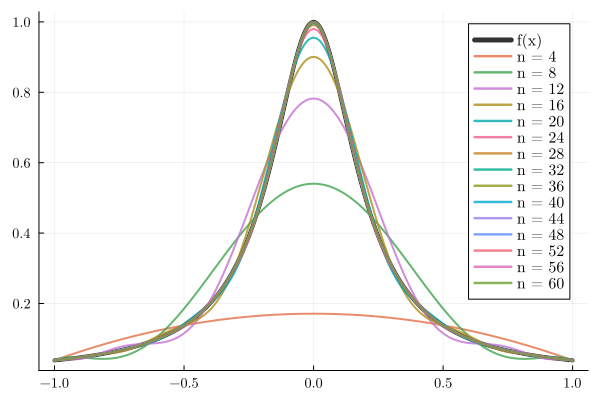

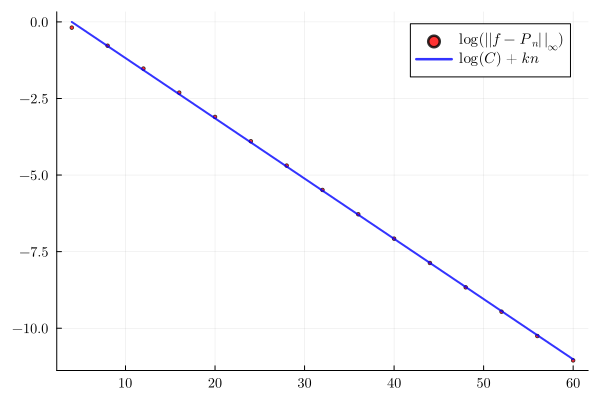

In [214]:
f(x) = 1/(25*(x^2) + 1)
ascisse = []
norme= []
#grafico 
x_plot = collect(range(-1, 1, length=500))
y_true = f.(x_plot)

grafico = plot(x_plot, y_true,
          linewidth = 4,
          color = :black,
          alpha = 0.8,
          label = "f(x)")

for n in 4:4:60
    push!(ascisse, n)
    #infinite norm
    g_interp(x) = chebyshev_interpolation_2kind(-1, 1, n, f, x)
    norm = infinite_norm(f, g_interp, -1, 1, 4000)
    println("n = $n, infinite norm = $norm")
    push!(norme, norm)

    #plot
     y_interp = [chebyshev_interpolation_2kind(-1, 1, n, f, xi) for xi in x_plot]
    
    # AGGIUNGI AL GRAFICO ESISTENTE
    plot!(grafico, x_plot, y_interp,
          linewidth = 2,
          alpha = 0.8,
          label = "n = $n")
    

end
A = hcat(ones(length(ascisse)), ascisse)
b = ls.normal_equations(A, log.(norme))
println("C=", exp(b[1]), ", k=", exp(-b[2]))
grafico_2 = plot(ascisse, log.(norme), 
              seriestype = :scatter, 
              markersize = 2, 
              color = :red, 
              alpha = 0.8, 
              label = L"$\log(||f - P_n||_\infty)$")
plot!(grafico_2, ascisse, b[1] .+ b[2] .* ascisse,
      linewidth = 2,
      color = :blue,
      alpha = 0.8,
      label = L"$\log(C) + k n$")
display(grafico)
display(grafico_2)

#equidistan points


punti equidistanti

n = 4, infinite norm = 0.7070120272972965
n = 8, infinite norm = 0.24735733195896692
n = 12, infinite norm = 0.5567740097341001
n = 16, infinite norm = 2.107550052021277
n = 20, infinite norm = 8.578740967195394
n = 24, infinite norm = 36.41003550450421
n = 28, infinite norm = 158.74710055816976
n = 32, infinite norm = 705.2388698495414
n = 36, infinite norm = 3176.7859453797237
n = 40, infinite norm = 14464.65492993581
n = 44, infinite norm = 66429.0194109054
n = 48, infinite norm = 307119.47833678266
n = 52, infinite norm = 1.4279549779630715e6
n = 56, infinite norm = 6.673345767164376e6
n = 60, infinite norm = 3.2097322924601976e7


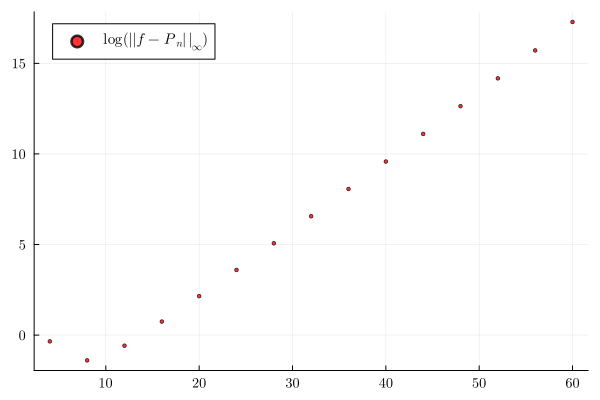

In [215]:
f(x) = 1/(25*(x^2) + 1)
ascisse = []
norme= []


for n in 4:4:60
    push!(ascisse, n)
    #infinite norm
    g_interp(x) = barycentric_interpolation_equidistant(-1, 1, n, f, x)
    norm = infinite_norm(f, g_interp, -1, 1, 4000)
    println("n = $n, infinite norm = $norm")
    push!(norme, norm)
    
end


grafico = plot(ascisse, log.(norme), 
              seriestype = :scatter, 
              markersize = 2, 
              color = :red, 
              alpha = 0.8, 
              label = L"$\log(||f - P_n||_\infty)$")

display(grafico)

#equidistan points


es 2.2

n = 4, infinite norm = 0.7422334636809881
n = 8, infinite norm = 0.1018792134456113
n = 12, infinite norm = 0.05946852528906432
n = 16, infinite norm = 0.009205226123259913
n = 20, infinite norm = 0.004202494012844338
n = 24, infinite norm = 0.0006409289561711828
n = 28, infinite norm = 0.00028977285476183834
n = 32, infinite norm = 4.726034748203656e-5
n = 36, infinite norm = 1.988672313962825e-5
n = 40, infinite norm = 3.3629616542629748e-6
n = 44, infinite norm = 1.3863114801671017e-6
n = 48, infinite norm = 2.409504618050562e-7
n = 52, infinite norm = 9.62475551480324e-8
n = 56, infinite norm = 1.723848042090026e-8
n = 60, infinite norm = 6.634984617281958e-9
C=2.265299626518929, k=1.3907013668397006


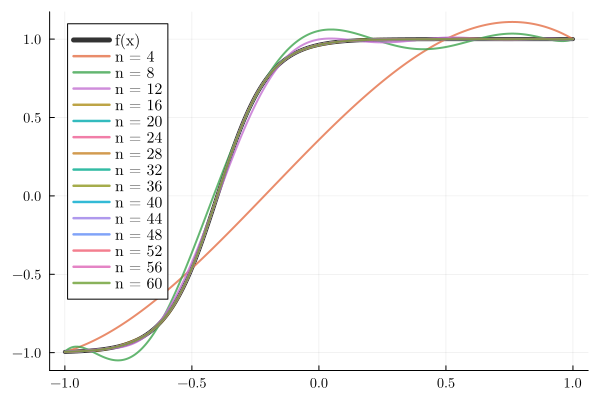

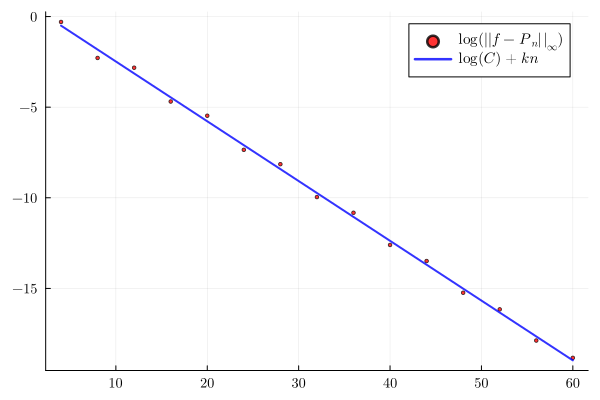

In [216]:
f(x) = tanh(5*x+2)
ascisse = []
norme= []
#grafico 

x_plot = collect(range(-1, 1, length=500))
y_true = f.(x_plot)

grafico = plot(x_plot, y_true,
          linewidth = 4,
          color = :black,
          alpha = 0.8,
          label = "f(x)")

for n in 4:4:60
    push!(ascisse, n)
    #infinite norm
    g_interp(x) = chebyshev_interpolation_2kind(-1, 1, n, f, x)
    norm = infinite_norm(f, g_interp, -1, 1, 4000)
    println("n = $n, infinite norm = $norm")
    push!(norme, norm)

    #plot
     y_interp = [chebyshev_interpolation_2kind(-1, 1, n, f, xi) for xi in x_plot]
    
    # AGGIUNGI AL GRAFICO ESISTENTE
    plot!(grafico, x_plot, y_interp,
          linewidth = 2,
          alpha = 0.8,
          label = "n = $n")
    

end

A = hcat(ones(length(ascisse)), ascisse)
b = ls.normal_equations(A, log.(norme))
println("C=", exp(b[1]), ", k=", exp(-b[2]))
grafico_2 = plot(ascisse, log.(norme), 
              seriestype = :scatter, 
              markersize = 2, 
              color = :red, 
              alpha = 0.8, 
              label = L"$\log(||f - P_n||_\infty)$")
plot!(grafico_2, ascisse, b[1] .+ b[2] .* ascisse,
      linewidth = 2,
      color = :blue,
      alpha = 0.8,
      label = L"$\log(C) + k n$")
display(grafico)
display(grafico_2)
    


equidistanti

n = 4, infinite norm = 0.6325321716423498
n = 8, infinite norm = 0.27676478779079483
n = 12, infinite norm = 0.7163366712985194
n = 16, infinite norm = 0.3210278334809813
n = 20, infinite norm = 1.4201382120156976
n = 24, infinite norm = 2.964069088211925
n = 28, infinite norm = 1.78051602063598
n = 32, infinite norm = 9.555993926610162
n = 36, infinite norm = 14.651706375653978
n = 40, infinite norm = 14.068247514159978
n = 44, infinite norm = 66.34389574959015
n = 48, infinite norm = 69.59901010773656
n = 52, infinite norm = 126.62751799517244
n = 56, infinite norm = 452.4145446374037
n = 60, infinite norm = 268.97747731958685


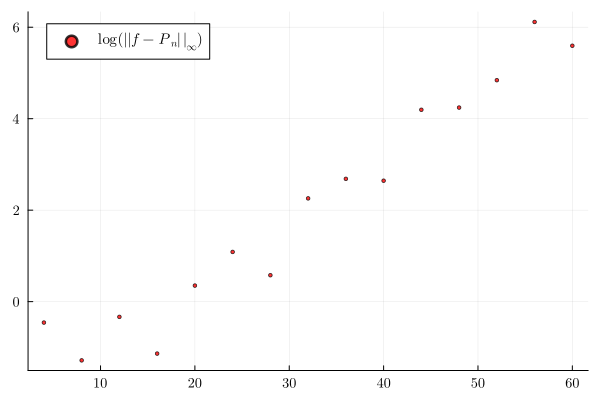

In [217]:
f(x) =tanh(5*x+2)
ascisse = []
norme= []


for n in 4:4:60
    push!(ascisse, n)
    #infinite norm
    g_interp(x) = barycentric_interpolation_equidistant(-1, 1, n, f, x)
    norm = infinite_norm(f, g_interp, -1, 1, 4000)
    println("n = $n, infinite norm = $norm")
    push!(norme, norm)
    
end


grafico = plot(ascisse, log.(norme), 
              seriestype = :scatter, 
              markersize = 2, 
              color = :red, 
              alpha = 0.8, 
              label = L"$\log(||f - P_n||_\infty)$")

display(grafico)

#equidistan points


n = 4, infinite norm = 0.031048032735084607
n = 8, infinite norm = 5.697134099613699e-5
n = 12, infinite norm = 4.2984990344940854e-8
n = 16, infinite norm = 1.0614309431389302e-10
n = 20, infinite norm = 1.709743457922741e-14
n = 24, infinite norm = 1.3322676295501878e-15
n = 28, infinite norm = 1.5543122344752192e-15
n = 32, infinite norm = 1.9984014443252818e-15
n = 36, infinite norm = 1.7763568394002505e-15
n = 40, infinite norm = 1.7763568394002505e-15
n = 44, infinite norm = 1.9984014443252818e-15
n = 48, infinite norm = 1.9984014443252818e-15
n = 52, infinite norm = 1.9984014443252818e-15
n = 56, infinite norm = 1.7763568394002505e-15
n = 60, infinite norm = 2.220446049250313e-15
C=50.39150197136832, k=5.704259499200477


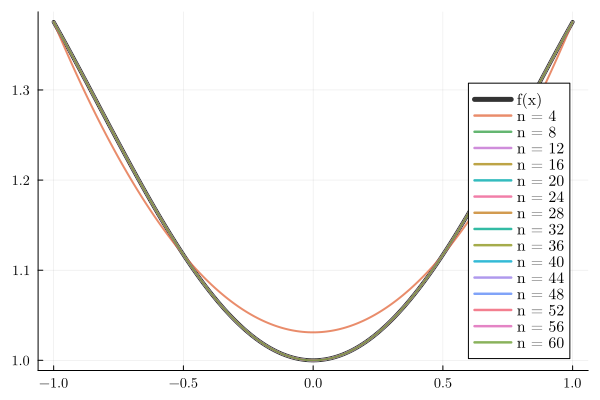

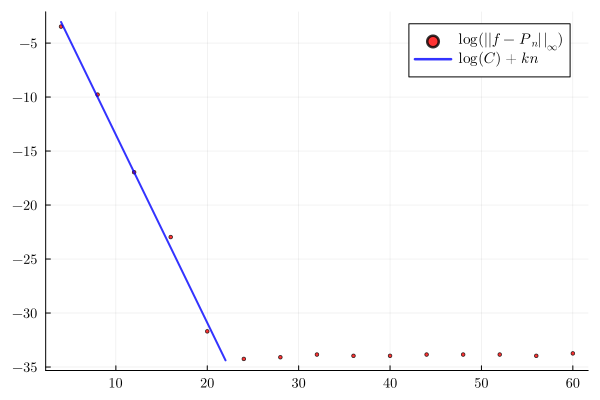

In [218]:
f(x) = cosh(sin(x))
ascisse = []
norme= []
#grafico 

x_plot = collect(range(-1, 1, length=500))
y_true = f.(x_plot)

grafico = plot(x_plot, y_true,
          linewidth = 4,
          color = :black,
          alpha = 0.8,
          label = "f(x)")

for n in 4:4:60
    push!(ascisse, n)
    #infinite norm
    g_interp(x) = chebyshev_interpolation_2kind(-1, 1, n, f, x)
    norm = infinite_norm(f, g_interp, -1, 1, 4000)
    println("n = $n, infinite norm = $norm")
    push!(norme, norm)

    #plot
     y_interp = [chebyshev_interpolation_2kind(-1, 1, n, f, xi) for xi in x_plot]
    
    # AGGIUNGI AL GRAFICO ESISTENTE
    plot!(grafico, x_plot, y_interp,
          linewidth = 2,
          alpha = 0.8,
          label = "n = $n")
    

end

A = hcat(ones(length(ascisse[1:5])), ascisse[1:5])
b = ls.normal_equations(A, log.(norme[1:5]))
println("C=", exp(b[1]), ", k=", exp(-b[2]))
grafico_2 = plot(ascisse, log.(norme), 
              seriestype = :scatter, 
              markersize = 2, 
              color = :red, 
              alpha = 0.8, 
              label = L"$\log(||f - P_n||_\infty)$")
ascisse2 = collect(range(ascisse[1], 22, length=100))
plot!(grafico_2, ascisse2, b[1] .+ b[2] .* ascisse2,
      linewidth = 2,
      color = :blue,
      alpha = 0.8,
      label = L"$\log(C) + k n$")
display(grafico)
display(grafico_2)
    


equidistanti

n = 4, infinite norm = 0.02423855036351852


n = 8, infinite norm = 9.765385975701868e-5
n = 12, infinite norm = 2.5760003352637284e-7
n = 16, infinite norm = 2.4115240915278946e-9
n = 20, infinite norm = 1.5705214906347464e-12
n = 24, infinite norm = 6.020073328727449e-12
n = 28, infinite norm = 1.0949419149142159e-10
n = 32, infinite norm = 7.155791514890097e-10
n = 36, infinite norm = 1.0336551170553321e-8
n = 40, infinite norm = 1.449502831096794e-7
n = 44, infinite norm = 2.0421284239180437e-6
n = 48, infinite norm = 2.4873440708006456e-5
n = 52, infinite norm = 0.0003766879923123856
n = 56, infinite norm = 0.004116438660683341
n = 60, infinite norm = 0.057609390950746464


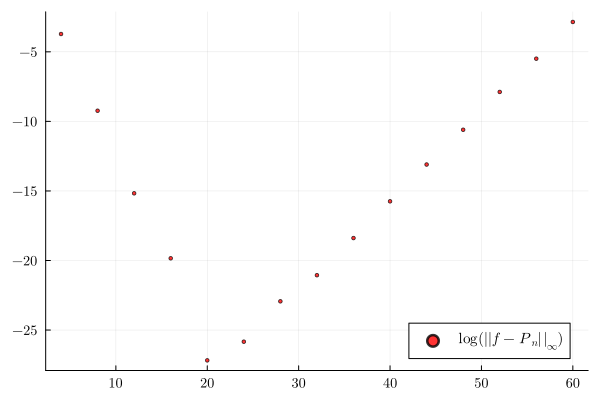

In [219]:
f(x) = cosh(sin(x))
ascisse = []
norme= []


for n in 4:4:60
    push!(ascisse, n)
    #infinite norm
    g_interp(x) = barycentric_interpolation_equidistant(-1, 1, n, f, x)
    norm = infinite_norm(f, g_interp, -1, 1, 4000)
    println("n = $n, infinite norm = $norm")
    push!(norme, norm)
    
end

grafico = plot(ascisse, log.(norme), 
              seriestype = :scatter, 
              markersize = 2, 
              color = :red, 
              alpha = 0.8, 
              label = L"$\log(||f - P_n||_\infty)$")


#equidistan points


n = 4, infinite norm = 0.029852673323598533
n = 8, infinite norm = 5.259344218244699e-6
n = 12, infinite norm = 1.605897704815007e-7
n = 16, infinite norm = 1.066419175188571e-10
n = 20, infinite norm = 1.488809076022335e-13
n = 24, infinite norm = 1.1102230246251565e-15
n = 28, infinite norm = 1.4432899320127035e-15
n = 32, infinite norm = 1.1102230246251565e-15
n = 36, infinite norm = 1.3322676295501878e-15
n = 40, infinite norm = 1.9984014443252818e-15
n = 44, infinite norm = 1.4432899320127035e-15
n = 48, infinite norm = 1.4432899320127035e-15
n = 52, infinite norm = 1.5543122344752192e-15
n = 56, infinite norm = 1.887379141862766e-15
n = 60, infinite norm = 1.6653345369377348e-15
C=8.12208553121908, k=4.813182204071624


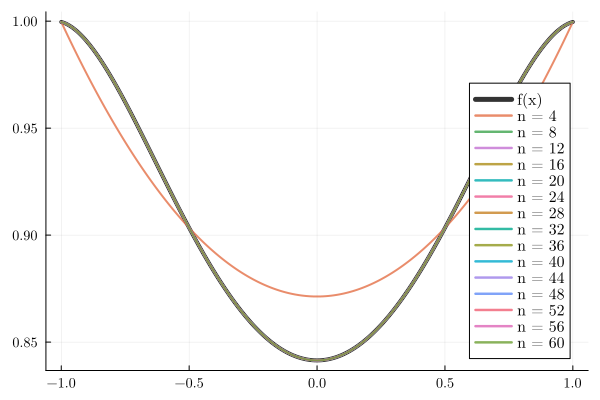

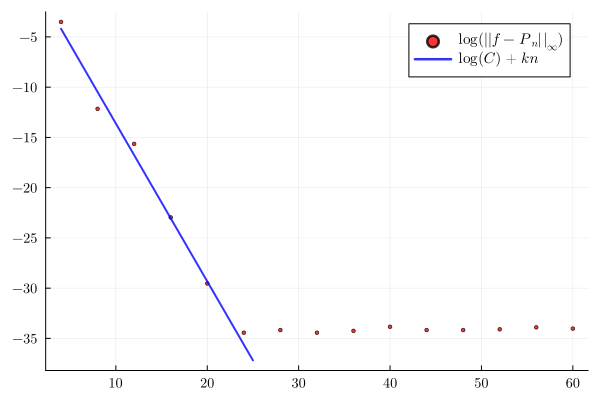

In [220]:
f(x) = sin(cosh(x))
ascisse = []
norme= []
#grafico 

x_plot = collect(range(-1, 1, length=500))
y_true = f.(x_plot)

grafico = plot(x_plot, y_true,
          linewidth = 4,
          color = :black,
          alpha = 0.8,
          label = "f(x)")

for n in 4:4:60
    push!(ascisse, n)
    #infinite norm
    g_interp(x) = chebyshev_interpolation_2kind(-1, 1, n, f, x)
    norm = infinite_norm(f, g_interp, -1, 1, 4000)
    println("n = $n, infinite norm = $norm")
    push!(norme, norm)

    #plot
     y_interp = [chebyshev_interpolation_2kind(-1, 1, n, f, xi) for xi in x_plot]
    
    # AGGIUNGI AL GRAFICO ESISTENTE
    plot!(grafico, x_plot, y_interp,
          linewidth = 2,
          alpha = 0.8,
          label = "n = $n")
    

end

A = hcat(ones(length(ascisse[1:5])), ascisse[1:5])
b = ls.normal_equations(A, log.(norme[1:5]))
println("C=", exp(b[1]), ", k=", exp(-b[2]))
grafico_2 = plot(ascisse, log.(norme), 
              seriestype = :scatter, 
              markersize = 2, 
              color = :red, 
              alpha = 0.8, 
              label = L"$\log(||f - P_n||_\infty)$")
ascisse2 = collect(range(ascisse[1], 25, length=100))
plot!(grafico_2, ascisse2, b[1] .+ b[2] .* ascisse2,
      linewidth = 2,
      color = :blue,
      alpha = 0.8,
      label = L"$\log(C) + k n$")
display(grafico)
display(grafico_2)
    
    


equidistanti

n = 4, infinite norm = 0.026122733111371033
n = 8, infinite norm = 4.067507872962395e-6
n = 12, infinite norm = 9.595218840585673e-7
n = 16, infinite norm = 2.18437212762268e-9
n = 20, infinite norm = 1.2970846618998166e-11
n = 24, infinite norm = 4.392153307719582e-12
n = 28, infinite norm = 7.668932155979746e-11
n = 32, infinite norm = 5.646011436155618e-10
n = 36, infinite norm = 7.839107030171988e-9
n = 40, infinite norm = 9.191878158620881e-8
n = 44, infinite norm = 1.6185306953575562e-6
n = 48, infinite norm = 2.3230334556756382e-5
n = 52, infinite norm = 0.00033563369942102295
n = 56, infinite norm = 0.0033563078901192034
n = 60, infinite norm = 0.04635813384188403


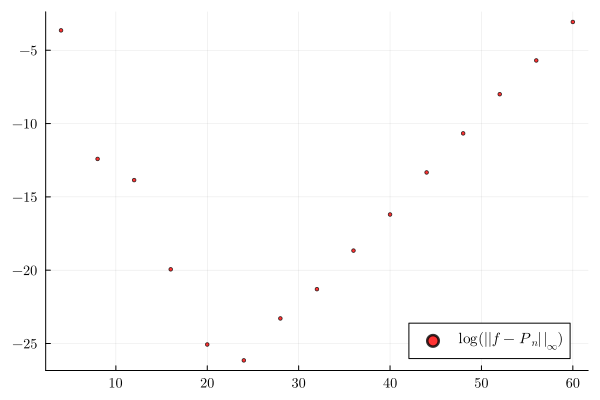

In [221]:
f(x) = sin(cosh(x))
ascisse = []
norme= []


for n in 4:4:60
    push!(ascisse, n)
    #infinite norm
    g_interp(x) = barycentric_interpolation_equidistant(-1, 1, n, f, x)
    norm = infinite_norm(f, g_interp, -1, 1, 4000)
    println("n = $n, infinite norm = $norm")
    push!(norme, norm)
    
end

grafico = plot(ascisse, log.(norme), 
              seriestype = :scatter, 
              markersize = 2, 
              color = :red, 
              alpha = 0.8, 
              label = L"$\log(||f - P_n||_\infty)$")


#equidistan points


es 3

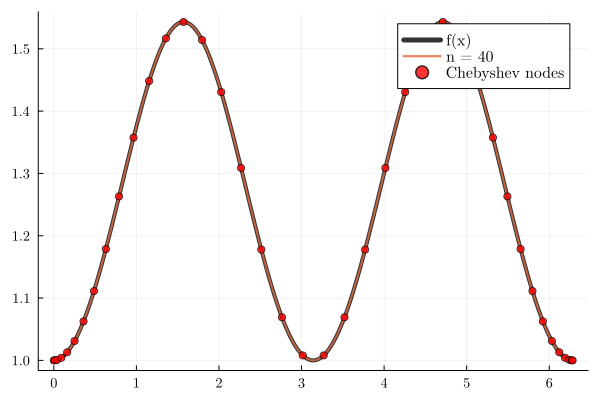

In [222]:
f(x) = cosh(sin(x))
ascisse = []
norme= []
#grafico 

x_plot = collect(range(0, 2*pi, length=500))
y_true = f.(x_plot)

grafico = plot(x_plot, y_true,
          linewidth = 4,
          color = :black,
          alpha = 0.8,
          label = "f(x)")

n= 40
ascisse = collect(1:1:40)
#plot
y_interp = [chebyshev_interpolation_2kind(0, 2*pi, n, f, xi) for xi in x_plot]

# AGGIUNGI AL GRAFICO ESISTENTE
plot!(grafico, x_plot, y_interp,
        linewidth = 2,
        alpha = 0.8,
        label = "n = $n")
plot!(grafico, chebyshev_nodes_2kind(0, 2*pi, n), f.(chebyshev_nodes_2kind(0, 2*pi, n)),
      seriestype = :scatter,
      markersize = 4,
      color = :red,
      alpha = 0.8,
      label = "Chebyshev nodes")

display(grafico)

    
